In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scvelo as scv
import scipy as sc
import seaborn as sns

from scipy import stats
from numpy.random import beta, poisson
from scipy.special import j_roots
from scipy.special import beta as beta_fun
from matplotlib import pyplot as plt

In [13]:
adata = ad.read('../data/processed/mus_musculus_preprocessed_all_params.h5ad')
c57 = adata.to_df('allele_c57').transpose()
cast = adata.to_df('allele_cast').transpose()

total = adata.to_df('total').transpose()


spliced = adata.to_df('spliced').transpose()

unspliced = adata.to_df('unspliced').transpose()

In [3]:
def dBP(at, alpha, bet, lam):
    at.shape = (len(at),1)
    np.repeat(at, 50, axis = 1)
    def fun(at, m):
        if(max(m) < 1e6):
            return(stats.poisson.pmf(at,m))
        else:
            return(stats.norm.pdf(at,loc=m,scale=sqrt(m)))
    if alpha <= 0 or bet <= 0:
        return np.nan
    x,w = j_roots(50,alpha = bet-1, beta = alpha - 1)
    gs = np.sum(w*fun(at, m = lam*(1+x)/2), axis=1)
    prob = 1/beta_fun(alpha, bet)*2**(-alpha-bet+1)*gs
    return(prob)

In [4]:
adata.var.columns

Index(['Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57',
       'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast',
       'ratio_sum_allele_c57', 'ratio_sum_allele_cast',
       'ratio_mean_allele_c57', 'ratio_mean_allele_cast',
       'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value',
       'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot',
       'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma',
       'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood',
       'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s',
       'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'c57_kon',
       'c57_koff', 'c57_ksyn', 'cast_kon', 'cast_koff', 'cast_ksyn',
       'total_kon', 'total_koff', 'total_ksyn', 'spliced_kon', 'spliced_koff',
       'spliced_ksyn', 'unspliced_kon', 'unspliced_koff', 'unspliced_ksyn',
       'total_s_u_kon', 'total_s_u_koff', 'total_s_u_k

In [12]:
df3 = adata.var[(adata.var.index == 'Fos') | (adata.var.index == 'Atf4')]

In [10]:
adata.var

,Accession,Chromosome,End,Start,Strand,sum_allele_c57,sum_allele_cast,sum_ratio_allele_c57,sum_ratio_allele_cast,ratio_sum_allele_c57,...,spliced_ksyn,unspliced_kon,unspliced_koff,unspliced_ksyn,total_s_u_kon,total_s_u_koff,total_s_u_ksyn,unspliced_by_total_kon,unspliced_by_total_koff,unspliced_by_total_ksyn
Gene,,,,,,,,,,,,,,,,,,,,,
Mrpl15,ENSMUSG00000033845,1,4785739,4773206,-,1175.0,1092.0,0.518306,0.481694,153.475673,...,2190.929841,0.075268,1.504743,139.701396,2.176995,12.495542,2190.929841,0.001,1.362095,1.000000
4732440D04Rik,ENSMUSG00000090031,1,6214590,6213293,-,1498.0,1261.0,0.542950,0.457050,308.882750,...,80.359250,0.001000,156.828722,1.000000,0.049667,4.569173,80.359250,0.001,156.828722,1.000000
Cops5,ENSMUSG00000025917,1,10038127,10024602,-,8192.0,7966.0,0.506993,0.493007,323.482196,...,11898.416600,0.114069,2.747117,277.678309,3.656598,29.409660,11898.416600,0.001,1.361855,32.486808
Arfgef1,ENSMUSG00000067851,1,10232670,10137571,-,1841.0,1842.0,0.499864,0.500136,284.025982,...,22803.915975,0.635087,7.516546,1120.810458,1.756567,184.983916,22803.915975,NaN,NaN,NaN
Tram1,ENSMUSG00000025935,1,13589864,13564702,-,7514.0,7028.0,0.516710,0.483290,350.605317,...,1.000000,0.282150,5.544402,826.352109,0.001000,8.264970,1.000000,0.001,1.362074,1.092651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Exosc7,ENSMUSG00000025785,9,123136129,123113215,+,3556.0,3447.0,0.507782,0.492218,317.695221,...,1772.273585,0.096363,1.875123,239.556712,1.229338,6.279444,1772.273585,NaN,NaN,NaN
Lars2,ENSMUSG00000035202,9,123462664,123366940,+,376.0,763.0,0.330114,0.669886,114.946627,...,1391.569082,0.211345,6.729131,513.758124,0.912919,18.076687,1391.569082,NaN,NaN,NaN
Sacm1l,ENSMUSG00000025240,9,123592598,123529882,+,1444.0,1262.0,0.533629,0.466371,267.715853,...,NaN,0.443060,15.381805,1889.522526,NaN,NaN,NaN,NaN,NaN,NaN


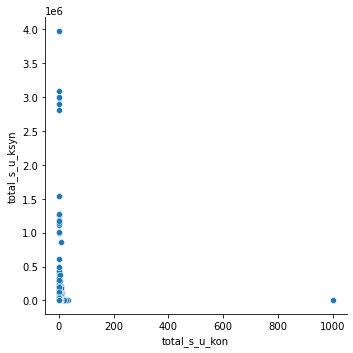

In [8]:
sns.relplot(data=adata.var, x="total_s_u_kon", y="total_s_u_ksyn")
plt.savefig('../data/figures/reprocessed/kon_vs_ksyn/Fig_scatterplot_kon_vs_ksyn_reprocessed.pdf')

In [9]:
df = adata.var[(adata.var.total_s_u_kon > 800)]

# df = adata.var[(adata.var.total_kon < 800) & (adata.var.total_kon > 25)]

df

,Accession,Chromosome,End,Start,Strand,sum_allele_c57,sum_allele_cast,sum_ratio_allele_c57,sum_ratio_allele_cast,ratio_sum_allele_c57,...,spliced_ksyn,unspliced_kon,unspliced_koff,unspliced_ksyn,total_s_u_kon,total_s_u_koff,total_s_u_ksyn,unspliced_by_total_kon,unspliced_by_total_koff,unspliced_by_total_ksyn
Gene,,,,,,,,,,,,,,,,,,,,,
Ddx56,ENSMUSG00000004393,11,6267772,6258919,-,21853.0,16857.0,0.564531,0.435469,385.685161,...,485.274739,0.138609,18.728754,1282.123812,1000.0,0.001,485.274739,NaN,NaN,NaN


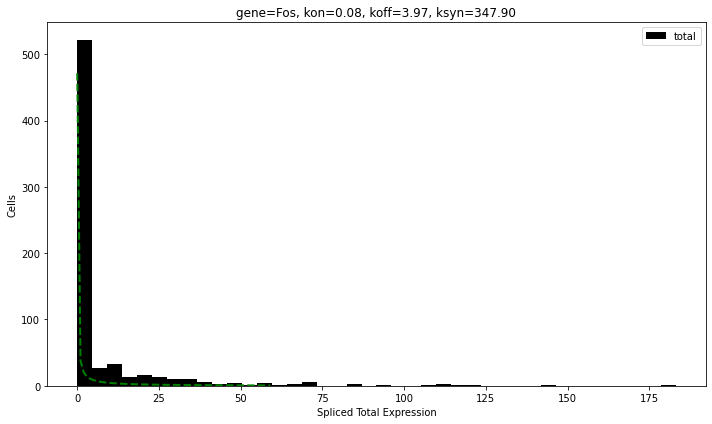

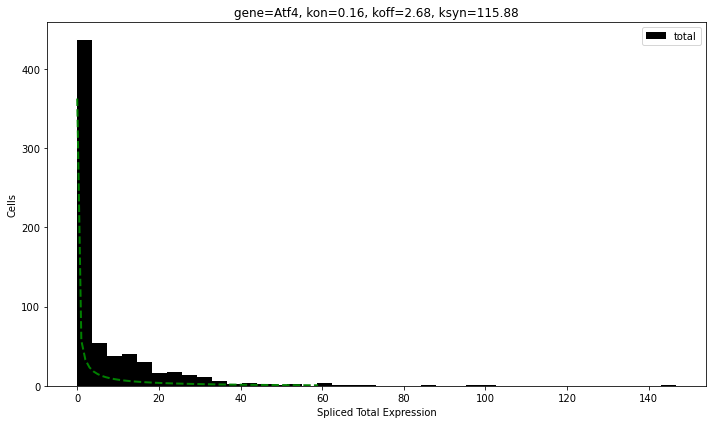

In [16]:
plt.rcParams["figure.figsize"] = (10,6)
for x in df3.index:
    cells = 682
    gene = x
    kon = df3.loc[x].unspliced_kon
    koff = df3.loc[x].unspliced_koff
    ksyn = df3.loc[x].unspliced_ksyn
    
    total_vec = unspliced.loc[x][pd.notnull(unspliced.loc[x])]
    
    plt.hist(total_vec, bins=40, label='total', color='black')
    plt.plot(cells*dBP(np.arange(60), kon, koff, ksyn),'g--',linewidth=2)
    plt.xlabel("Spliced Total Expression")
    plt.ylabel("Cells")
    plt.title("gene=%s, kon=%.2f, koff=%.2f, ksyn=%.2f" % (gene,kon, koff, ksyn))
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig('../data/figures/reprocessed/kon_vs_ksyn/Fig_binplot_{}_total_reprocessed.pdf'.format(gene))
    plt.show()


saving figure to file ../data/figures/reprocessed/kon_vs_ksyn/Fig_scatterplot_Ddx56_total_reprocessed.pdf


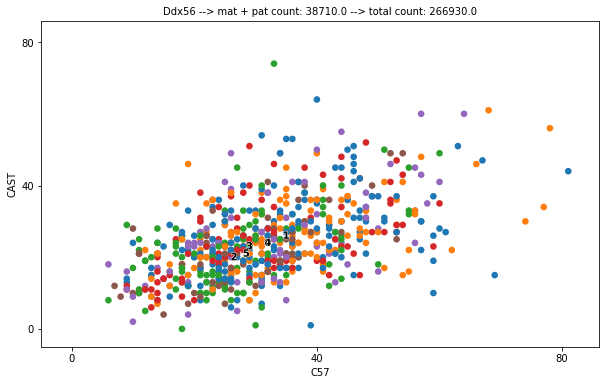

In [11]:
for x in df.index:
    mat_c57 = c57.loc[x][pd.notnull(c57.loc[x])]
    pat_cast = cast.loc[x][pd.notnull(cast.loc[x])]
    
    total_vec = total.loc[x][pd.notnull(total.loc[x])]

    
    total_counts = np.sum(mat_c57) + np.sum(pat_cast)
    
    total_count_all = np.sum(total_vec)
    
    max_c57 = np.max(mat_c57)
    max_cast= np.max(pat_cast)
    max_count = np.max([max_c57, max_cast])
    pad = 1+ int(0.05 * max_count)
    x_lim = (-pad, max_count + pad)
    y_lim = (-pad, max_count + pad)
    
    scv.pl.scatter(adata, x=mat_c57, y=pat_cast, normalize_data= False,
                   xlabel='C57', ylabel='CAST', title=f"{x} --> mat + pat count: {total_counts} --> total count: {total_count_all}",
                   xlim=x_lim, ylim=y_lim, save='../data/figures/reprocessed/kon_vs_ksyn/Fig_scatterplot_{}_total_reprocessed.pdf'.format(x))

In [14]:
df2 = adata.var[(adata.var.total_s_u_ksyn > 2.5 * 1e6)]
df2

,Accession,Chromosome,End,Start,Strand,sum_allele_c57,sum_allele_cast,sum_ratio_allele_c57,sum_ratio_allele_cast,ratio_sum_allele_c57,...,spliced_ksyn,unspliced_kon,unspliced_koff,unspliced_ksyn,total_s_u_kon,total_s_u_koff,total_s_u_ksyn,unspliced_by_total_kon,unspliced_by_total_koff,unspliced_by_total_ksyn
Gene,,,,,,,,,,,,,,,,,,,,,
Apba3,ENSMUSG00000004931,10,81273246,81268172,+,2425.0,2542.0,0.488222,0.511778,295.630554,...,2.806525e+06,0.055733,6.907347,171.265769,0.640243,1000.0,2.806525e+06,NaN,NaN,NaN
Lman2,ENSMUSG00000021484,13,55362783,55343833,-,2590.0,2543.0,0.504578,0.495422,336.912079,...,2.994944e+06,0.136795,13.734152,819.753046,0.604663,1000.0,2.994944e+06,0.001000,1.361836,20.749479
Snx9,ENSMUSG00000002365,17,5931033,5841328,+,2717.0,2444.0,0.526448,0.473552,347.992842,...,3.977415e+06,0.271479,999.554380,197457.136190,0.951382,1000.0,3.977415e+06,NaN,NaN,NaN
Zadh2,ENSMUSG00000049090,18,84097514,84088158,+,5235.0,6037.0,0.464425,0.535575,315.646783,...,3.091498e+06,0.194199,6.539026,895.449289,0.977324,1000.0,3.091498e+06,0.001000,1.362097,1.000000
Rit1,ENSMUSG00000028057,3,88731049,88716838,+,464.0,517.0,0.472987,0.527013,172.036111,...,2.898323e+06,0.146845,15.812880,1200.375184,0.415774,1000.0,2.898323e+06,0.003410,1.364354,1.454355
Ncor2,ENSMUSG00000029478,5,125179219,125017153,-,1295.0,1359.0,0.487943,0.512057,291.386100,...,3.004533e+06,0.535377,8.809075,1398.761679,0.785459,1000.0,3.004533e+06,0.179664,47.664190,21.156868


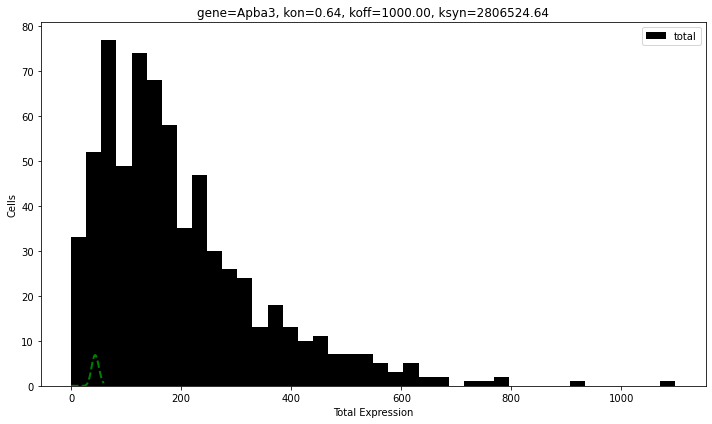

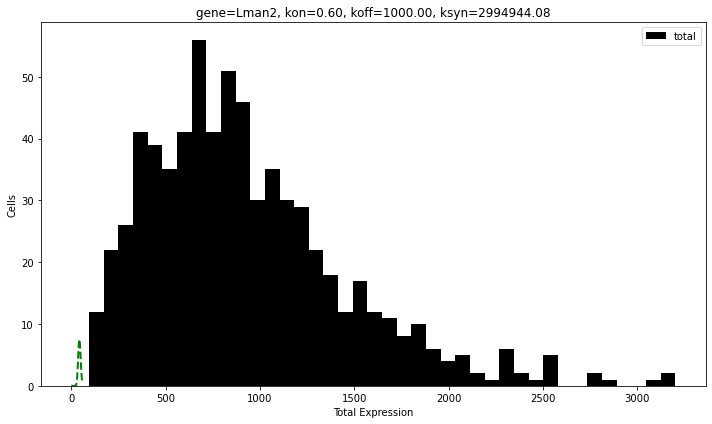

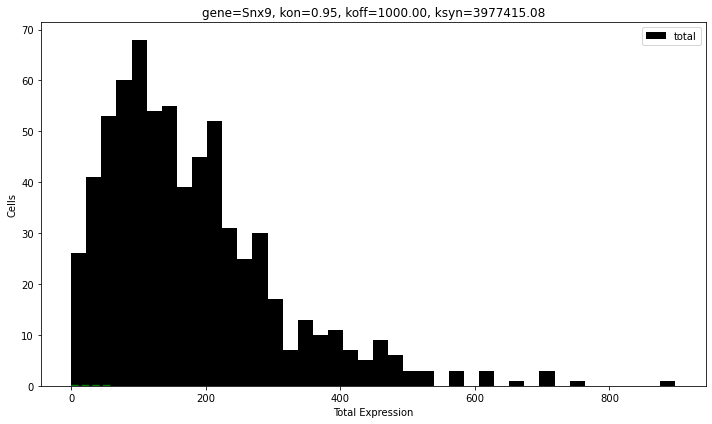

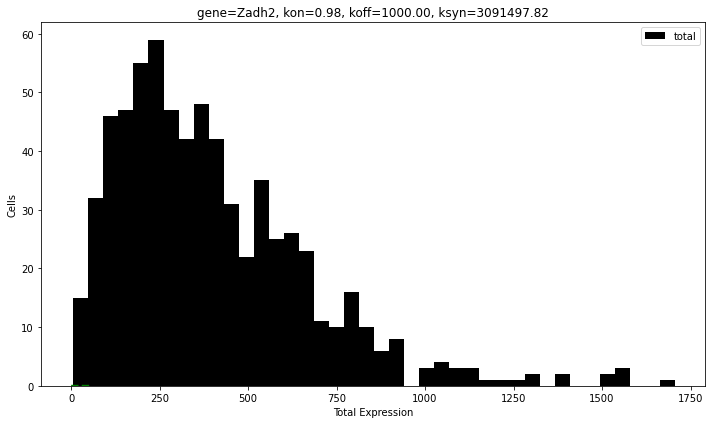

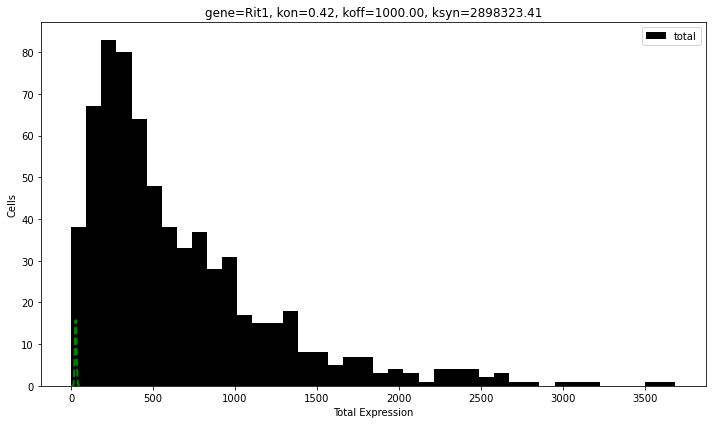

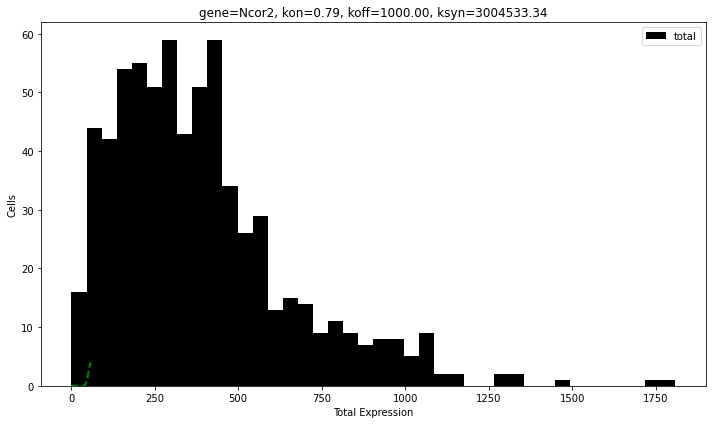

In [15]:
plt.rcParams["figure.figsize"] = (10,6)
for x in df2.index:
    cells = 682
    gene = x
    kon = df2.loc[x].total_s_u_kon
    koff = df2.loc[x].total_s_u_koff
    ksyn = df2.loc[x].total_s_u_ksyn
    
    total_vec = total.loc[x][pd.notnull(total.loc[x])]
    
    plt.hist(total_vec, bins=40, label='total', color='black')
    plt.plot(cells*dBP(np.arange(60), kon, koff, ksyn),'g--',linewidth=2)
    plt.xlabel("Total Expression")
    plt.ylabel("Cells")
    plt.title("gene=%s, kon=%.2f, koff=%.2f, ksyn=%.2f" % (gene,kon, koff, ksyn))
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig('../data/figures/reprocessed/kon_vs_ksyn/Fig_binplot_{}_total_reprocessed.pdf'.format(gene))
    plt.show()

saving figure to file ../data/figures/reprocessed/kon_vs_ksyn/Fig_scatterplot_Apba3_total_reprocessed.pdf


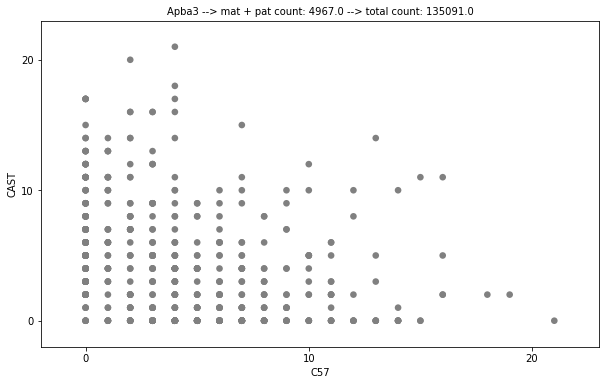

saving figure to file ../data/figures/reprocessed/kon_vs_ksyn/Fig_scatterplot_Lman2_total_reprocessed.pdf


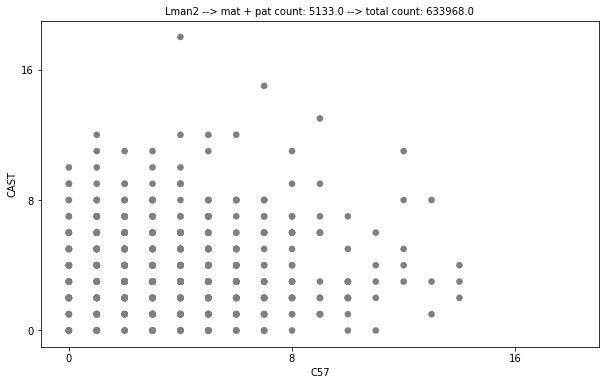

saving figure to file ../data/figures/reprocessed/kon_vs_ksyn/Fig_scatterplot_Snx9_total_reprocessed.pdf


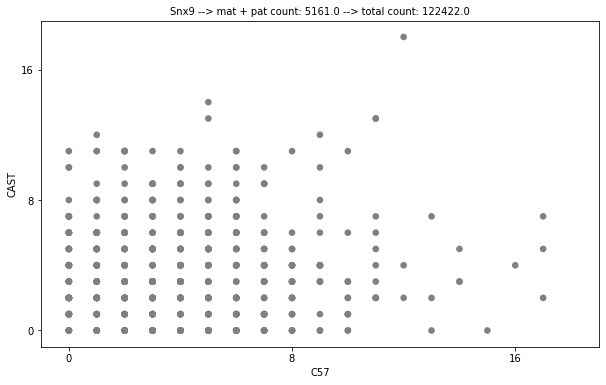

saving figure to file ../data/figures/reprocessed/kon_vs_ksyn/Fig_scatterplot_Zadh2_total_reprocessed.pdf


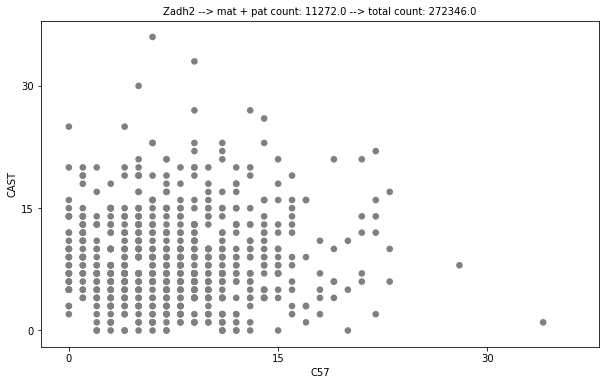

saving figure to file ../data/figures/reprocessed/kon_vs_ksyn/Fig_scatterplot_Rit1_total_reprocessed.pdf


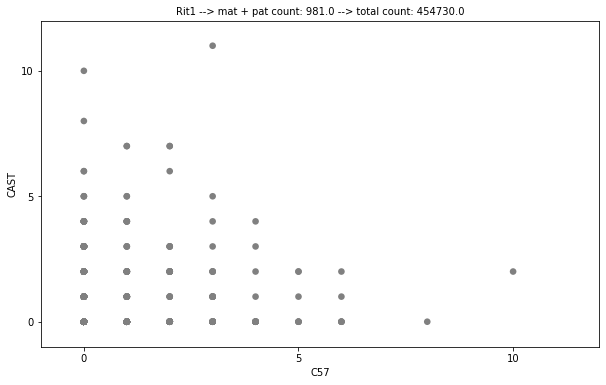

saving figure to file ../data/figures/reprocessed/kon_vs_ksyn/Fig_scatterplot_Ncor2_total_reprocessed.pdf


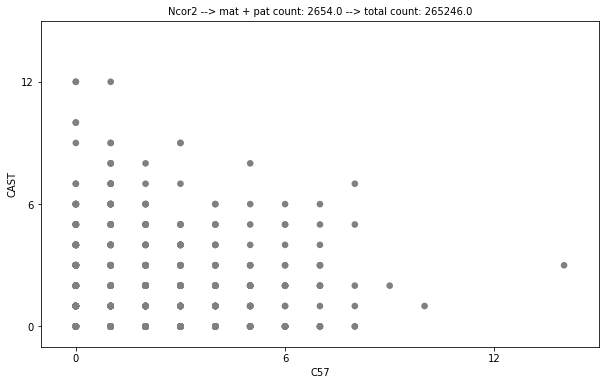

In [16]:
for x in df2.index:
    mat_c57 = c57.loc[x][pd.notnull(c57.loc[x])]
    pat_cast = cast.loc[x][pd.notnull(cast.loc[x])]
    
    total_vec = total.loc[x][pd.notnull(total.loc[x])]

    
    total_counts = np.sum(mat_c57) + np.sum(pat_cast)
    
    total_count_all = np.sum(total_vec)
    
    max_c57 = np.max(mat_c57)
    max_cast= np.max(pat_cast)
    max_count = np.max([max_c57, max_cast])
    pad = 1+ int(0.05 * max_count)
    x_lim = (-pad, max_count + pad)
    y_lim = (-pad, max_count + pad)
    
    scv.pl.scatter(adata, x=mat_c57, y=pat_cast, normalize_data= False,
                   xlabel='C57', ylabel='CAST', title=f"{x} --> mat + pat count: {total_counts} --> total count: {total_count_all}",
                   xlim=x_lim, ylim=y_lim, save='../data/figures/reprocessed/kon_vs_ksyn/Fig_scatterplot_{}_total_reprocessed.pdf'.format(x))